In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [4]:
salarios = pd.read_csv('Position_Salaries.csv')

In [5]:
salarios.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [7]:
X = salarios.iloc[:, 1:-1].values
y = salarios.iloc[:, -1].values

## Pre-processsamento

In [15]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

#Obs: É necessario fazer o reshape do y para executar o fit_transform
y = y.reshape(len(y), 1) # Converte para uma matriz de n, 1
y_scaled = y_scaler.fit_transform(y)

## Treinamento e teste

In [16]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_scaled, y_scaled)

SVR()

## Visualização dos resultados

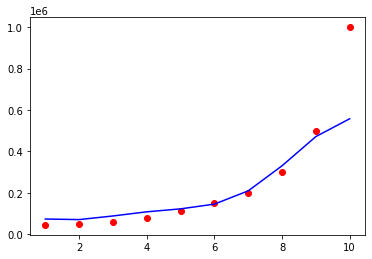

In [23]:
_ = plt.scatter(X, y, color='red')
plt.plot(X_scaler.inverse_transform(X_scaled), y_scaler.inverse_transform(svr.predict(X_scaled)), color='blue')

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
y_pred = y_scaler.inverse_transform(svr.predict(X_scaled))
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 63332.392089689674
MSE: 20036494264.13176
RMSE: 141550.3241399742
